In [1]:
#load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix

In [2]:
import pandas as pd
# defining file path 
path="../../Data/cancer/cancer.csv"

#define names
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis","stage", "benign_sample_diagnosis", "plasma_CA19_9", "creatinine","LYVE1", "REG1B", "TFF1", "REG1A"]
# Load data in pandas dataframe
cancer_data = pd.read_csv(path, names=names, skiprows=1)


In [3]:
# take a peak at the dataset
print(cancer_data.head(20))



   sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0         S1        Cohort1          BPTB   33   F          1   NaN   
1        S10        Cohort1          BPTB   81   F          1   NaN   
2       S100        Cohort2          BPTB   51   M          1   NaN   
3       S101        Cohort2          BPTB   61   M          1   NaN   
4       S102        Cohort2          BPTB   62   M          1   NaN   
5       S103        Cohort2          BPTB   53   M          1   NaN   
6       S104        Cohort2          BPTB   70   M          1   NaN   
7       S105        Cohort2          BPTB   58   F          1   NaN   
8       S106        Cohort2          BPTB   59   F          1   NaN   
9       S107        Cohort2          BPTB   56   F          1   NaN   
10      S108        Cohort2          BPTB   77   F          1   NaN   
11      S109        Cohort2          BPTB   71   M          1   NaN   
12       S11        Cohort1          BPTB   49   F          1   NaN   
13    

In [4]:
#show data shape
print(cancer_data.shape)

(590, 14)


In [5]:
# obtain count, mean, min, max, and percentiles 
print(cancer_data.describe())

              age   diagnosis  plasma_CA19_9  creatinine       LYVE1  \
count  590.000000  590.000000     350.000000  590.000000  590.000000   
mean    59.079661    2.027119     654.002944    0.855383    3.063530   
std     13.109520    0.804873    2430.317642    0.639028    3.438796   
min     26.000000    1.000000       0.000000    0.056550    0.000129   
25%     50.000000    1.000000       8.000000    0.373230    0.167179   
50%     60.000000    2.000000      26.500000    0.723840    1.649862   
75%     69.000000    3.000000     294.000000    1.139482    5.205037   
max     89.000000    3.000000   31000.000000    4.116840   23.890323   

             REG1B          TFF1         REG1A  
count   590.000000    590.000000    306.000000  
mean    111.774090    597.868722    735.281222  
std     196.267110   1010.477245   1477.247724  
min       0.001104      0.005293      0.000000  
25%      10.757216     43.961000     80.692000  
50%      34.303353    259.873974    208.538500  
75%     

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check for missing values
print("\nMissing values per column:\n")
print(cancer_data.isnull().sum())



Missing values per column:

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64


In [7]:
# 2. Summary stats for categorical variables
print("\nSummary statistics for categorical columns:\n")
print(cancer_data.describe(include=['object']))


Summary statistics for categorical columns:

       sample_id patient_cohort sample_origin  sex stage  \
count        590            590           590  590   199   
unique       590              2             4    2     8   
top           S1        Cohort1          BPTB    F   III   
freq           1            332           409  299    76   

       benign_sample_diagnosis  
count                      208  
unique                      52  
top               Pancreatitis  
freq                        41  


In [8]:
# 3. Distribution of diagnosis classes
print("\nDiagnosis class counts:\n")
print(cancer_data['diagnosis'].value_counts())


Diagnosis class counts:

2    208
3    199
1    183
Name: diagnosis, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


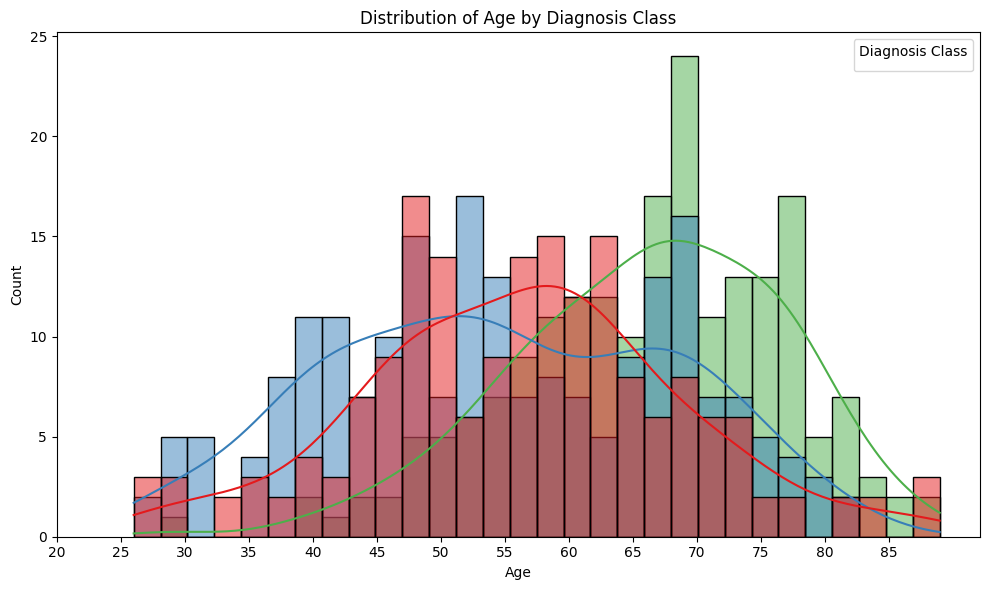

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure age is numeric
cancer_data['age'] = pd.to_numeric(cancer_data['age'], errors='coerce')

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=cancer_data, x='age', hue='diagnosis', bins=30, kde=True, palette="Set1", edgecolor="black")

plt.title("Distribution of Age by Diagnosis Class")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Diagnosis Class')

# Clean x-axis
plt.xticks(np.arange(20, 90, 5))

plt.tight_layout()
plt.show()


In [10]:
# List of numeric features to analyze
numeric_features = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

# Convert to numeric, forcing errors to NaN
for col in numeric_features:
    cancer_data[col] = pd.to_numeric(cancer_data[col], errors='coerce')

# Drop rows with missing values in numeric columns
clean_data = cancer_data[numeric_features].dropna()

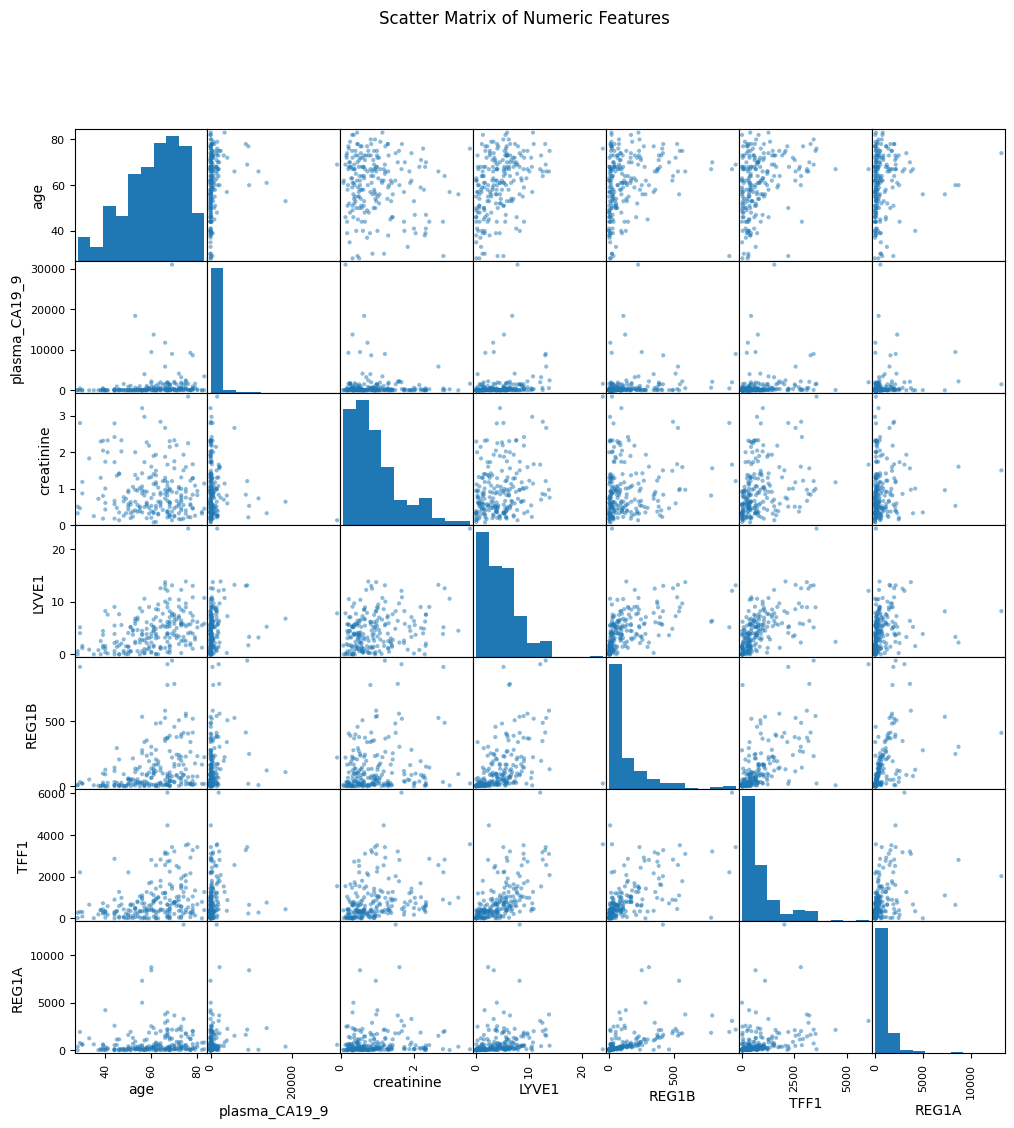

In [11]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
#make scatter plot
scatter_matrix(clean_data, figsize=(12, 12))
plt.suptitle("Scatter Matrix of Numeric Features")
plt.show()

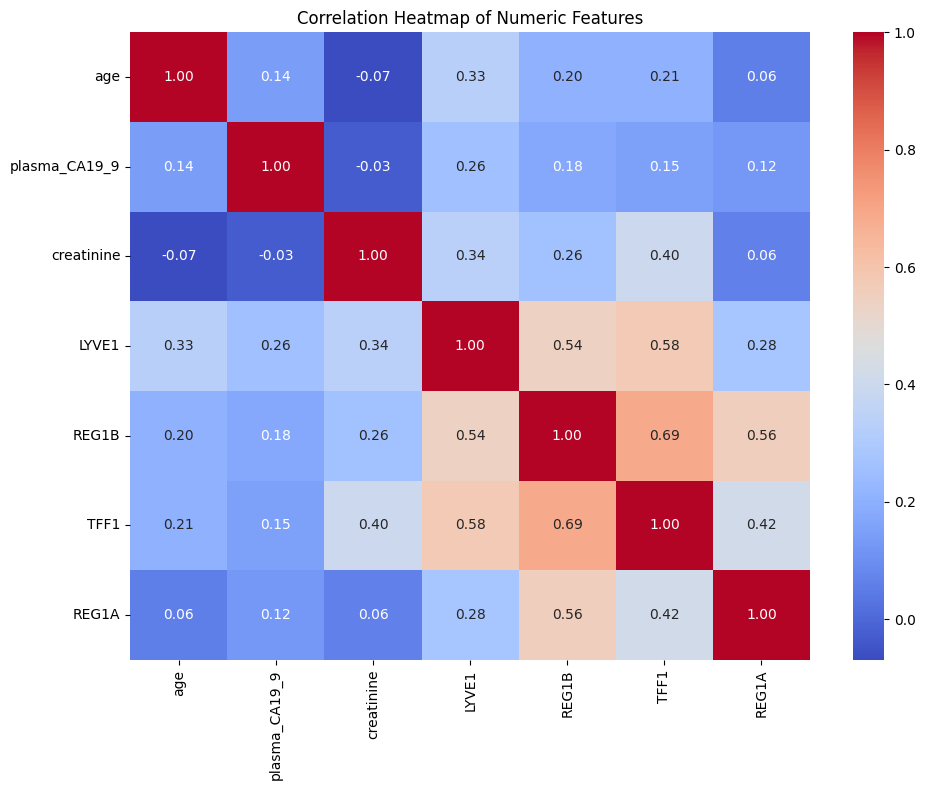

In [12]:
# 6. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cancer_data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

# Load the dataset correctly using the header row in the CSV
path = "../../Data/cancer/cancer.csv"
data = pd.read_csv(path)  # Removed names=...

# Drop unwanted columns
drop_cols = [
    "sample_id", "patient_cohort", "sample_origin", "age", "sex",
    "stage", "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"
]
clean_data = data.drop(columns=drop_cols)

# Encode diagnosis as categorical codes: will become 0, 1, 2
clean_data["diagnosis"] = clean_data["diagnosis"].astype("category").cat.codes

# Show the cleaned data
print(clean_data.head(10))


   diagnosis  creatinine     LYVE1      REG1B        TFF1
0          0     1.83222  0.893219   52.94884  654.282174
1          0     0.97266  2.037585   94.46703  209.488250
2          0     0.78039  0.145589  102.36600  461.141000
3          0     0.70122  0.002805   60.57900  142.950000
4          0     0.21489  0.000860   65.54000   41.088000
5          0     0.84825  0.003393   62.12600   59.793000
6          0     0.62205  0.174381  152.27700  117.516000
7          0     0.89349  0.003574    3.73000   40.294000
8          0     0.48633  0.001945    7.02100   26.782000
9          0     0.61074  0.278778   83.92800   19.185000


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Encode diagnosis
clean_data["diagnosis"] = clean_data["diagnosis"].astype("category").cat.codes

# Define X and y
X = clean_data.drop("diagnosis", axis=1)
y = clean_data["diagnosis"]

# Binarize labels for ROC-AUC
y_binarized = label_binarize(y, classes=[0, 1, 2])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "SVM": SVC(probability=True),
    "kNN": KNeighborsClassifier()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)

    recall = recall_score(y_test, y_pred, average="macro")
    roc_auc = roc_auc_score(y_test_bin, y_proba, average="macro")

    print(f"{name}:")
    print(f"  Recall Score: {recall:.3f}")
    print(f"  ROC-AUC:      {roc_auc:.3f}\n")


Logistic Regression:
  Recall Score: 0.667
  ROC-AUC:      0.828

Random Forest:
  Recall Score: 0.686
  ROC-AUC:      0.826

XGBoost:
  Recall Score: 0.625
  ROC-AUC:      0.814

SVM:
  Recall Score: 0.620
  ROC-AUC:      0.804

kNN:
  Recall Score: 0.588
  ROC-AUC:      0.771



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, roc_auc_score

# Load and clean data
file_path = "../../Data/cancer/cancer.csv"
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis",
         "stage", "benign_sample_diagnosis", "plasma_CA19_9", "creatinine",
         "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(file_path, names=names, skiprows=1)

# Drop unneeded columns
drop_columns = ["sample_id", "patient_cohort", "sample_origin", "age", "sex",
                "stage", "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_columns)

# Encode diagnosis
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes

# Drop missing values
data = data.dropna()

# Split features/target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarize for multiclass AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", solver="liblinear"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", n_estimators=50),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42),
    "kNN": KNeighborsClassifier()
}

# Train, evaluate, and collect results
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None

    if y_proba is not None:
        roc_auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
    else:
        roc_auc = float("nan")

    recall = recall_score(y_test, y_pred, average="macro")
    results.append({"Model": name, "ROC-AUC": roc_auc, "Recall": recall})

# Output performance
results_df = pd.DataFrame(results)
print(results_df)


                 Model   ROC-AUC    Recall
0  Logistic Regression  0.818800  0.628126
1        Random Forest  0.829505  0.651857
2              XGBoost  0.819775  0.642172
3                  SVM  0.806132  0.611866
4                  kNN  0.770890  0.587558


In [16]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, f1_score, accuracy_score
from sklearn.metrics import recall_score, roc_auc_score

# Load and clean data
file_path = "../../Data/cancer/cancer.csv"
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis",
         "stage", "benign_sample_diagnosis", "plasma_CA19_9", "creatinine",
         "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(file_path, names=names, skiprows=1)

# Drop unneeded columns
drop_columns = ["sample_id", "patient_cohort", "sample_origin", "age", "sex",
                "stage", "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_columns)

# Encode diagnosis
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes

# Drop missing values
data = data.dropna()

# Split features/target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binarize for multiclass AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", solver="liblinear"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", n_estimators=50),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42),
    "kNN": KNeighborsClassifier()
}
# Train, evaluate, and collect results
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None

    if y_proba is not None:
        roc_auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
    else:
        roc_auc = float("nan")

    recall = recall_score(y_test, y_pred, average="macro")
    precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro")
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

# Output performance
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.618644   0.609860  0.628126  0.582716  0.818800
1        Random Forest  0.652542   0.655435  0.651857  0.650740  0.829505
2              XGBoost  0.644068   0.641176  0.642172  0.638884  0.819775
3                  SVM  0.601695   0.587650  0.611866  0.555511  0.806132
4                  kNN  0.584746   0.583408  0.587558  0.584226  0.770890


<Figure size 600x400 with 0 Axes>

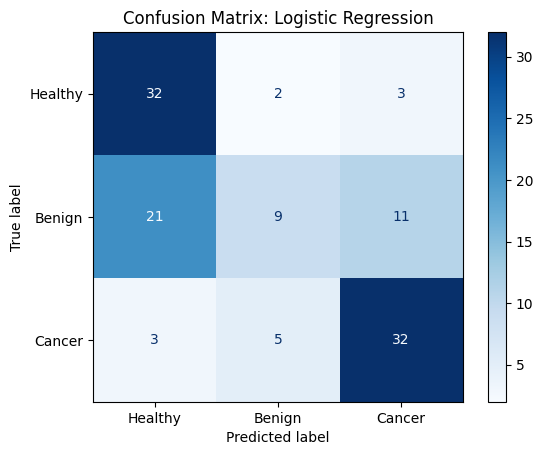

<Figure size 600x400 with 0 Axes>

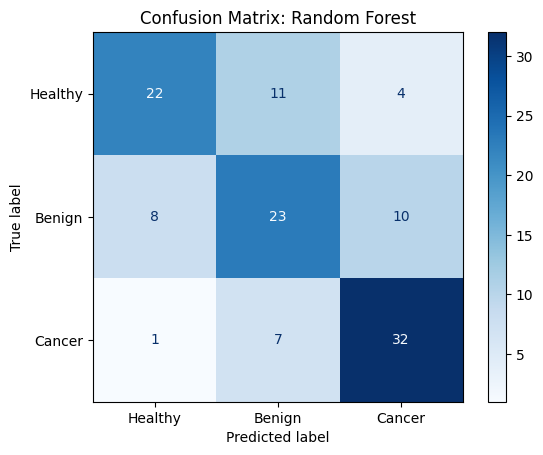

<Figure size 600x400 with 0 Axes>

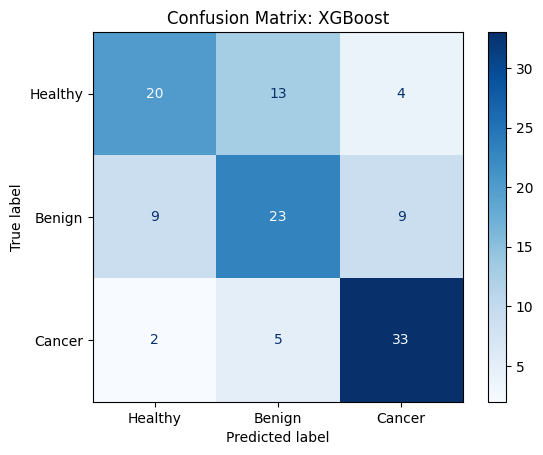

<Figure size 600x400 with 0 Axes>

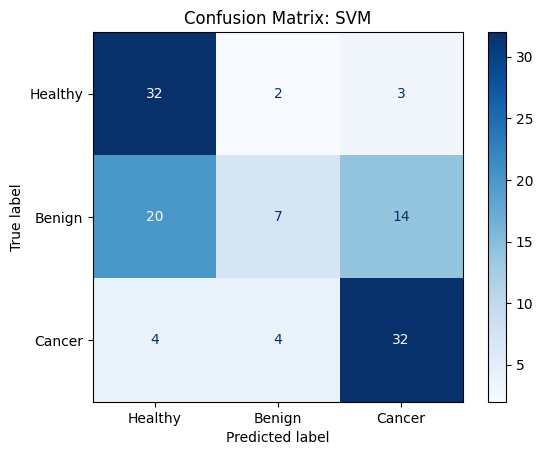

<Figure size 600x400 with 0 Axes>

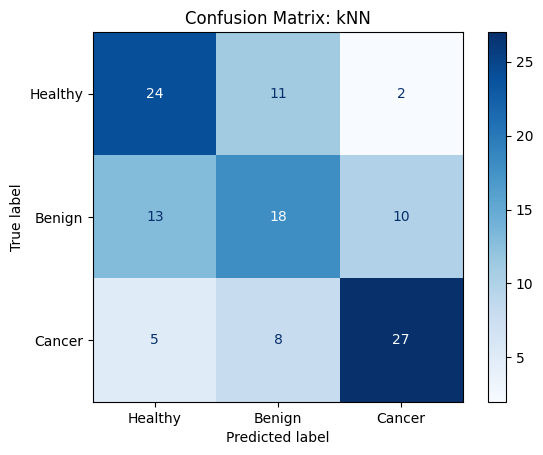

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Benign", "Cancer"])
    
    plt.figure(figsize=(6, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.grid(False)
    plt.show()


In [18]:
import numpy as np
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize

print("\n--- Evaluation with Threshold = 0.4 ---\n")

# Binarize y_test for ROC-AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
threshold = 0.2

for name, model in models.items():
    if not hasattr(model, "predict_proba"):
        print(f"{name} skipped (no predict_proba support)\n")
        continue

    # Predict probabilities
    y_proba = model.predict_proba(X_test_scaled)

    # Predict classes based on threshold
    y_pred_thresh = [np.argmax(probs) if max(probs) >= threshold else np.argmax(probs) for probs in y_proba]

    # Compute metrics
    recall = recall_score(y_test, y_pred_thresh, average="macro")
    roc_auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")

    print(f"{name}:")
    print(f"  Recall (Threshold 0.4): {recall:.3f}")
    print(f"  ROC-AUC:               {roc_auc:.3f}\n")



--- Evaluation with Threshold = 0.4 ---

Logistic Regression:
  Recall (Threshold 0.4): 0.628
  ROC-AUC:               0.819

Random Forest:
  Recall (Threshold 0.4): 0.652
  ROC-AUC:               0.830

XGBoost:
  Recall (Threshold 0.4): 0.642
  ROC-AUC:               0.820

SVM:
  Recall (Threshold 0.4): 0.609
  ROC-AUC:               0.806

kNN:
  Recall (Threshold 0.4): 0.588
  ROC-AUC:               0.771



In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    recall_score,
    roc_auc_score,
    precision_score,
    f1_score,
    accuracy_score
)
from sklearn.preprocessing import label_binarize

print("\n--- Evaluation with Threshold = 0.4 ---\n")

# Binarize y_test for ROC-AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
threshold = 0.4

# Collect results for table output
results_thresh = []

for name, model in models.items():
    if not hasattr(model, "predict_proba"):
        print(f"{name} skipped (no predict_proba support)\n")
        continue

    # Predict probabilities
    y_proba = model.predict_proba(X_test_scaled)

    # Predict classes using threshold = 0.4
    y_pred_thresh = [np.argmax(probs) if max(probs) >= threshold else np.argmax(probs) for probs in y_proba]


    # Metrics
    recall = recall_score(y_test, y_pred_thresh, average="macro")
    roc_auc = roc_auc_score(y_test_bin, y_proba, average="macro", multi_class="ovr")
    precision = precision_score(y_test, y_pred_thresh, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, average="macro")
    accuracy = accuracy_score(y_test, y_pred_thresh)

    # Print metrics (same as before for recall & ROC-AUC)
    print(f"{name}:")
    print(f"  Recall (Threshold 0.4): {recall:.3f}")
    print(f"  ROC-AUC:               {roc_auc:.3f}")
    print(f"  Precision:             {precision:.3f}")
    print(f"  F1-Score:              {f1:.3f}")
    print(f"  Accuracy:              {accuracy:.3f}\n")

    # Store for DataFrame if needed later
    results_thresh.append({
        "Model": name,
        "Recall": recall,
        "ROC-AUC": roc_auc,
        "Precision": precision,
        "F1-Score": f1,
        "Accuracy": accuracy
    })

# Optional: display all results as table
results_df = pd.DataFrame(results_thresh)
print("\n--- Full Evaluation Table ---\n")
print(results_df)



--- Evaluation with Threshold = 0.4 ---

Logistic Regression:
  Recall (Threshold 0.4): 0.628
  ROC-AUC:               0.819
  Precision:             0.610
  F1-Score:              0.583
  Accuracy:              0.619

Random Forest:
  Recall (Threshold 0.4): 0.652
  ROC-AUC:               0.830
  Precision:             0.655
  F1-Score:              0.651
  Accuracy:              0.653

XGBoost:
  Recall (Threshold 0.4): 0.642
  ROC-AUC:               0.820
  Precision:             0.641
  F1-Score:              0.639
  Accuracy:              0.644

SVM:
  Recall (Threshold 0.4): 0.609
  ROC-AUC:               0.806
  Precision:             0.578
  F1-Score:              0.581
  Accuracy:              0.602

kNN:
  Recall (Threshold 0.4): 0.588
  ROC-AUC:               0.771
  Precision:             0.583
  F1-Score:              0.584
  Accuracy:              0.585


--- Full Evaluation Table ---

                 Model    Recall   ROC-AUC  Precision  F1-Score  Accuracy
0  Logistic 

In [20]:
y_proba = model.predict_proba(X_test_scaled)
threshold = 0.4 
y_pred_custom = []

for probs in y_proba:
    if probs[2] >= threshold:
        y_pred_custom.append(2)  # cancer
    else:
        y_pred_custom.append(np.argmax(probs))  # fallback to highest prob
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom, target_names=["Normal", "Benign", "Cancer"]))

[[21 10  6]
 [12 13 16]
 [ 3  3 34]]
              precision    recall  f1-score   support

      Normal       0.58      0.57      0.58        37
      Benign       0.50      0.32      0.39        41
      Cancer       0.61      0.85      0.71        40

    accuracy                           0.58       118
   macro avg       0.56      0.58      0.56       118
weighted avg       0.56      0.58      0.56       118




--- Confusion Matrices (Threshold = 0.4) ---



<Figure size 600x400 with 0 Axes>

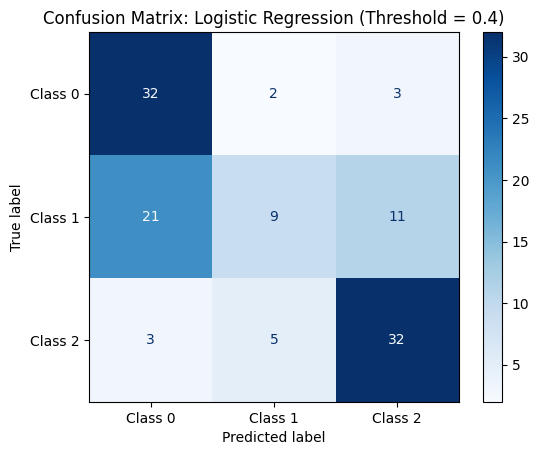

<Figure size 600x400 with 0 Axes>

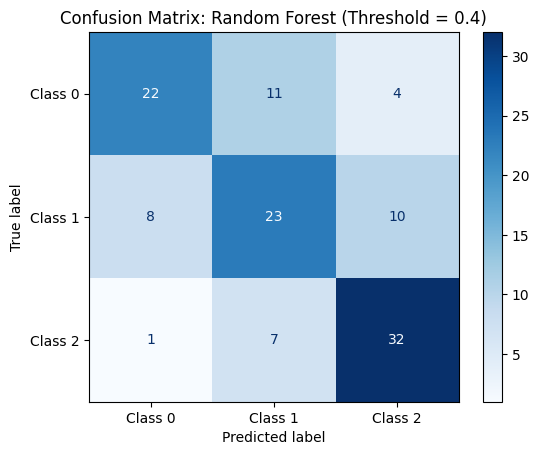

<Figure size 600x400 with 0 Axes>

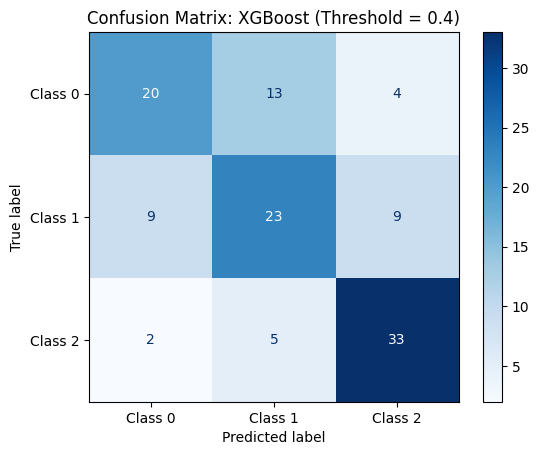

<Figure size 600x400 with 0 Axes>

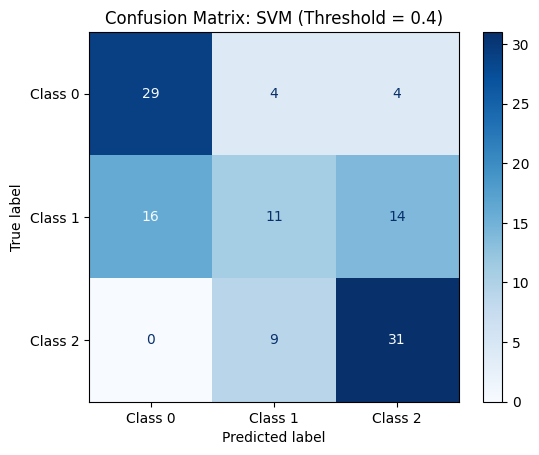

<Figure size 600x400 with 0 Axes>

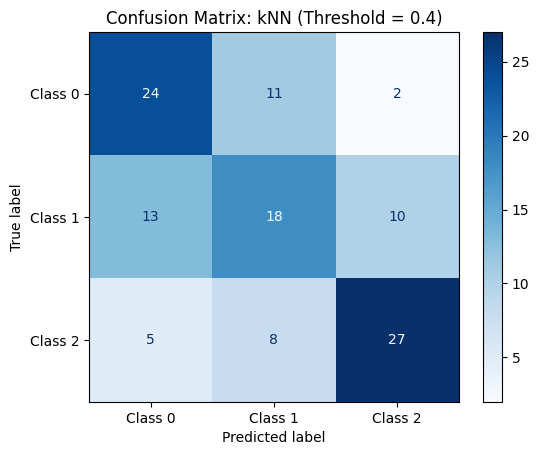

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

print("\n--- Confusion Matrices (Threshold = 0.4) ---\n")
threshold = 0.4

for name, model in models.items():
    if not hasattr(model, "predict_proba"):
        print(f"{name} skipped (no predict_proba support)\n")
        continue

    y_proba = model.predict_proba(X_test_scaled)

    # Threshold-based prediction
    y_pred_thresh = [np.argmax(probs) if max(probs) >= threshold else np.argmax(probs) for probs in y_proba]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_thresh, labels=[0, 1, 2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
    
    plt.figure(figsize=(6, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {name} (Threshold = 0.4)")
    plt.grid(False)
    plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, roc_auc_score, precision_score, f1_score, accuracy_score

# Load data
path = "../../Data/cancer/cancer.csv" # or use full path if needed
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis", "stage", 
         "benign_sample_diagnosis", "plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(path, names=names, skiprows=1)

# Drop unused columns
drop_cols = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "stage", 
             "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_cols)

# Drop missing values
data = data.dropna()

# Encode diagnosis
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes

# Keep only Healthy (0) and Cancer (2), drop Benign (1)
data = data[data['diagnosis'].isin([0, 2])]
data['diagnosis'] = data['diagnosis'].replace({2: 1})  # Make it binary: 0 = Healthy, 1 = Cancer

# Split features/target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=20
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", solver="liblinear"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42),
    "kNN": KNeighborsClassifier()
}

# Evaluation with threshold = 0.4
threshold = 0.4
print("\n--- Binary Classification: Healthy vs Cancer (Threshold = 0.4) ---\n")

for name, model in models.items():
    if not hasattr(model, "predict_proba"):
        print(f"{name} skipped (no predict_proba support)\n")
        continue

    model.fit(X_train_scaled, y_train)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of cancer

    # Apply threshold
    y_pred_thresh = (y_proba >= threshold).astype(int)

    # Compute metrics
    recall = recall_score(y_test, y_pred_thresh)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)

    # Print results
    print(f"{name}:")
    print(f"  Recall:    {recall:.3f}")
    print(f"  ROC-AUC:   {roc_auc:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  F1-Score:  {f1:.3f}")
    print(f"  Accuracy:  {accuracy:.3f}\n")



--- Binary Classification: Healthy vs Cancer (Threshold = 0.4) ---

Logistic Regression:
  Recall:    0.875
  ROC-AUC:   0.914
  Precision: 0.833
  F1-Score:  0.854
  Accuracy:  0.844

Random Forest:
  Recall:    0.925
  ROC-AUC:   0.909
  Precision: 0.755
  F1-Score:  0.831
  Accuracy:  0.805

XGBoost:
  Recall:    0.900
  ROC-AUC:   0.919
  Precision: 0.766
  F1-Score:  0.828
  Accuracy:  0.805

SVM:
  Recall:    0.875
  ROC-AUC:   0.911
  Precision: 0.795
  F1-Score:  0.833
  Accuracy:  0.818

kNN:
  Recall:    0.950
  ROC-AUC:   0.925
  Precision: 0.809
  F1-Score:  0.874
  Accuracy:  0.857



In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, roc_auc_score, precision_score, f1_score, accuracy_score

# Load data
path = "../../Data/cancer/cancer.csv" # or use full path if needed
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis", "stage", 
         "benign_sample_diagnosis", "plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(path, names=names, skiprows=1)

# Drop unused columns
drop_cols = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "stage", 
             "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_cols)

# Drop missing values
data = data.dropna()

# Encode diagnosis
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes

# Keep only Healthy (0) and Cancer (2), drop Benign (1)
data = data[data['diagnosis'].isin([0, 2])]
data['diagnosis'] = data['diagnosis'].replace({2: 1})  # Make it binary: 0 = Healthy, 1 = Cancer

# Split features/target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=20
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", solver="liblinear"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42),
    "kNN": KNeighborsClassifier()
}

# Evaluation with threshold = 0.5
threshold = 0.5
print("\n--- Binary Classification: Healthy vs Cancer (Threshold = 0.5) ---\n")

for name, model in models.items():
    if not hasattr(model, "predict_proba"):
        print(f"{name} skipped (no predict_proba support)\n")
        continue

    model.fit(X_train_scaled, y_train)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of cancer

    # Apply threshold
    y_pred_thresh = (y_proba >= threshold).astype(int)

    # Compute metrics
    recall = recall_score(y_test, y_pred_thresh)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)

    # Print results
    print(f"{name}:")
    print(f"  Recall:    {recall:.3f}")
    print(f"  ROC-AUC:   {roc_auc:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  F1-Score:  {f1:.3f}")
    print(f"  Accuracy:  {accuracy:.3f}\n")



--- Binary Classification: Healthy vs Cancer (Threshold = 0.5) ---

Logistic Regression:
  Recall:    0.850
  ROC-AUC:   0.914
  Precision: 0.895
  F1-Score:  0.872
  Accuracy:  0.870

Random Forest:
  Recall:    0.825
  ROC-AUC:   0.909
  Precision: 0.767
  F1-Score:  0.795
  Accuracy:  0.779

XGBoost:
  Recall:    0.850
  ROC-AUC:   0.919
  Precision: 0.810
  F1-Score:  0.829
  Accuracy:  0.818

SVM:
  Recall:    0.850
  ROC-AUC:   0.911
  Precision: 0.810
  F1-Score:  0.829
  Accuracy:  0.818

kNN:
  Recall:    0.875
  ROC-AUC:   0.925
  Precision: 0.875
  F1-Score:  0.875
  Accuracy:  0.870



In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, roc_auc_score, precision_score, f1_score, accuracy_score

# Load data
path = "../../Data/cancer/cancer.csv"
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis", "stage", 
         "benign_sample_diagnosis", "plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(path, names=names, skiprows=1)

# Preprocess
drop_cols = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "stage", 
             "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_cols).dropna()
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes
data = data[data['diagnosis'].isin([0, 2])]
data['diagnosis'] = data['diagnosis'].replace({2: 1})

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", solver="liblinear"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42),
    "kNN": KNeighborsClassifier()
}

# Function to evaluate models at a given threshold
def evaluate_models(threshold):
    rows = []
    for name, model in models.items():
        if not hasattr(model, "predict_proba"):
            continue
        model.fit(X_train_scaled, y_train)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)
        rows.append({
            "Model": name,
            "Threshold": threshold,
            "Recall": recall_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba),
            "Precision": precision_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "Accuracy": accuracy_score(y_test, y_pred)
        })
    return pd.DataFrame(rows)

# Run for both thresholds
results_04 = evaluate_models(0.4)
results_05 = evaluate_models(0.5)
final_results = pd.concat([results_04, results_05]).sort_values(by=["Model", "Threshold"])

# Display table
print("\nModel Evaluation Results:\n")
print(final_results.to_string(index=False))



Model Evaluation Results:

              Model  Threshold  Recall  ROC-AUC  Precision  F1-Score  Accuracy
Logistic Regression        0.4   0.875 0.914189   0.833333  0.853659  0.844156
Logistic Regression        0.5   0.850 0.914189   0.894737  0.871795  0.870130
      Random Forest        0.4   0.925 0.908784   0.755102  0.831461  0.805195
      Random Forest        0.5   0.825 0.908784   0.767442  0.795181  0.779221
                SVM        0.4   0.875 0.910811   0.795455  0.833333  0.818182
                SVM        0.5   0.850 0.910811   0.809524  0.829268  0.818182
            XGBoost        0.4   0.900 0.918919   0.765957  0.827586  0.805195
            XGBoost        0.5   0.850 0.918919   0.809524  0.829268  0.818182
                kNN        0.4   0.950 0.925338   0.808511  0.873563  0.857143
                kNN        0.5   0.875 0.925338   0.875000  0.875000  0.870130


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, roc_auc_score, precision_score, f1_score, accuracy_score

# Load data
path = "../../Data/cancer/cancer.csv"
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis", "stage", 
         "benign_sample_diagnosis", "plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(path, names=names, skiprows=1)

# Preprocess
drop_cols = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "stage", 
             "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_cols).dropna()
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes
data = data[data['diagnosis'].isin([0, 2])]
data['diagnosis'] = data['diagnosis'].replace({2: 1})

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", solver="liblinear"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=20),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=20),
    "kNN": KNeighborsClassifier()
}

# Function to evaluate models at a given threshold
def evaluate_models(threshold):
    rows = []
    for name, model in models.items():
        if not hasattr(model, "predict_proba"):
            continue
        model.fit(X_train_scaled, y_train)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)
        rows.append({
            "Model": name,
            "Threshold": threshold,
            "Recall": recall_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba),
            "Precision": precision_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "Accuracy": accuracy_score(y_test, y_pred)
        })
    return pd.DataFrame(rows)

# Run for both thresholds
results_04 = evaluate_models(0.4)
final_results = pd.concat([results_04]).sort_values(by=["Model", "Threshold"])

# Display table
print("\nModel Performance Evaluation Results:\n")
print(final_results.to_string(index=False))



Model Performance Evaluation Results:

              Model  Threshold  Recall  ROC-AUC  Precision  F1-Score  Accuracy
Logistic Regression        0.4   0.875 0.914189   0.833333  0.853659  0.844156
      Random Forest        0.4   0.925 0.909122   0.770833  0.840909  0.818182
                SVM        0.4   0.875 0.910811   0.795455  0.833333  0.818182
            XGBoost        0.4   0.900 0.918919   0.765957  0.827586  0.805195
                kNN        0.4   0.950 0.925338   0.808511  0.873563  0.857143


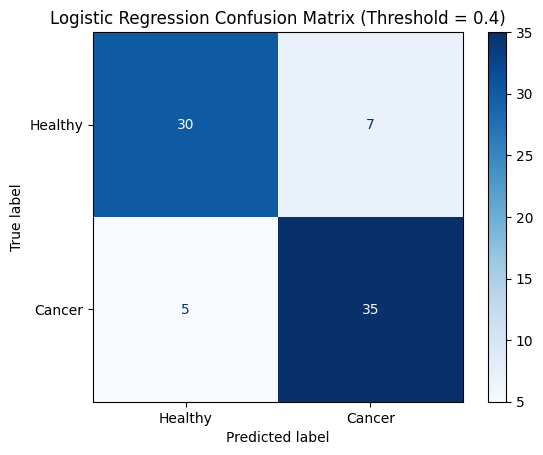

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train Logistic Regression model
model = LogisticRegression(class_weight="balanced", solver="liblinear")
model.fit(X_train_scaled, y_train)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of cancer

# Generate predictions for both thresholds
thresholds = [0.4]

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred_thresh)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Cancer"])
    
    # Plot confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Logistic Regression Confusion Matrix (Threshold = {thresh})")
    plt.show()



--- Confusion Matrices (Threshold = 0.4) ---



<Figure size 600x400 with 0 Axes>

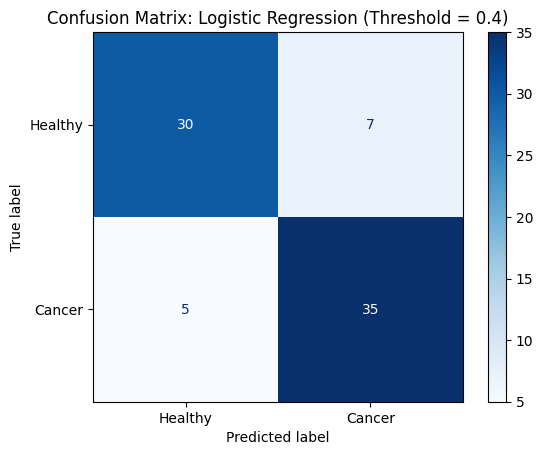

<Figure size 600x400 with 0 Axes>

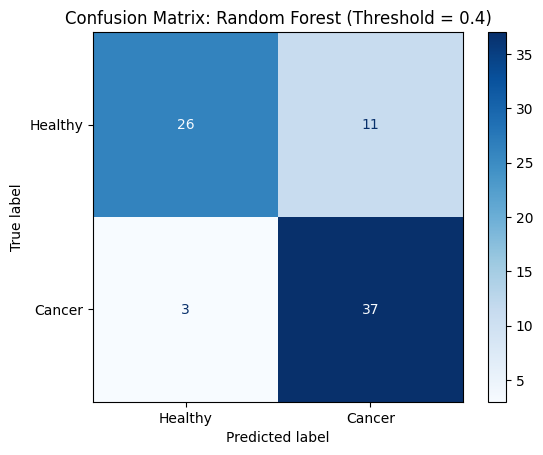

<Figure size 600x400 with 0 Axes>

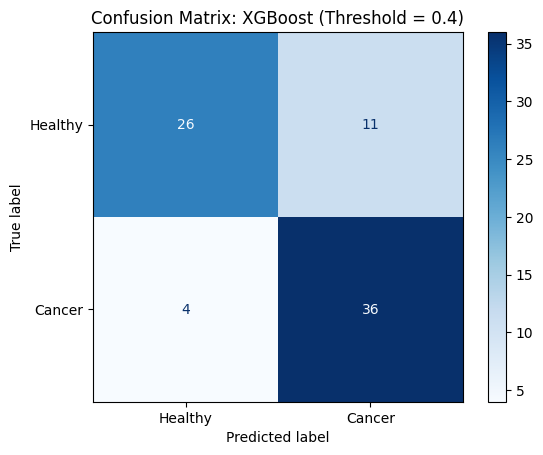

<Figure size 600x400 with 0 Axes>

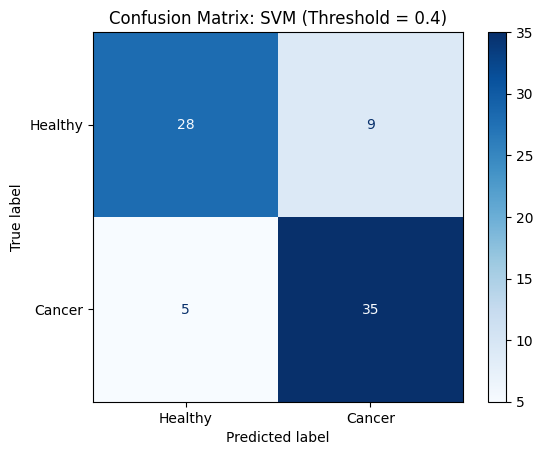

<Figure size 600x400 with 0 Axes>

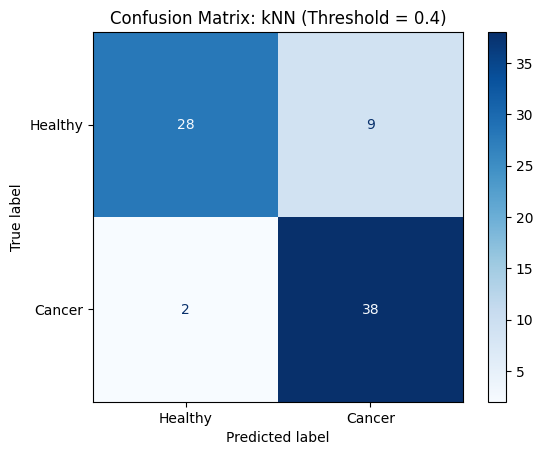

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

print("\n--- Confusion Matrices (Threshold = 0.4) ---\n")
threshold = 0.4

for name, model in models.items():
    if not hasattr(model, "predict_proba"):
        print(f"{name} skipped (no predict_proba support)\n")
        continue

    # Predict probabilities of the positive class (Cancer = 1)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Apply threshold
    y_pred_thresh = (y_proba >= threshold).astype(int)

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred_thresh, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Cancer"])
    
    plt.figure(figsize=(6, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix: {name} (Threshold = 0.4)")
    plt.grid(False)
    plt.show()

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, roc_auc_score, precision_score, f1_score, accuracy_score

# Load data
path = "../../Data/cancer/cancer.csv"
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis",
         "stage", "benign_sample_diagnosis", "plasma_CA19_9", "creatinine",
         "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(path, names=names, skiprows=1)

# Drop unnecessary columns
drop_cols = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "stage", 
             "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_cols)

# Encode target
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes

# Filter to only class 0 (healthy) and class 1 (benign)
data = data[data['diagnosis'].isin([0, 1])]

# Relabel: healthy (0) stays 0, benign (1) becomes 1 (already correct if label codes preserved)
# If unsure, force relabel:
data['diagnosis'] = data['diagnosis'].map({0: 0, 1: 1})

# Drop missing values
data = data.dropna()

# Split features and labels
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=20
)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", solver="liblinear"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(probability=True, class_weight="balanced"),
    "kNN": KNeighborsClassifier()
}

threshold = 0.5

# Evaluate models
print("\n--- Benign vs Healthy Evaluation (Threshold = 0.5) ---\n")
for name, model in models.items():
    if not hasattr(model, "predict_proba"):
        print(f"{name} skipped (no predict_proba support)\n")
        continue

    model.fit(X_train_scaled, y_train)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Prob of class 1 (benign)
    y_pred = (y_proba >= threshold).astype(int)

    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  Recall:    {recall:.3f}")
    print(f"  ROC-AUC:   {roc_auc:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  F1-Score:  {f1:.3f}")
    print(f"  Accuracy:  {acc:.3f}\n")



--- Benign vs Healthy Evaluation (Threshold = 0.5) ---

Logistic Regression:
  Recall:    0.452
  ROC-AUC:   0.612
  Precision: 0.679
  F1-Score:  0.543
  Accuracy:  0.595

Random Forest:
  Recall:    0.667
  ROC-AUC:   0.703
  Precision: 0.609
  F1-Score:  0.636
  Accuracy:  0.595

XGBoost:
  Recall:    0.667
  ROC-AUC:   0.664
  Precision: 0.636
  F1-Score:  0.651
  Accuracy:  0.620

SVM:
  Recall:    0.619
  ROC-AUC:   0.674
  Precision: 0.634
  F1-Score:  0.627
  Accuracy:  0.608

kNN:
  Recall:    0.667
  ROC-AUC:   0.693
  Precision: 0.683
  F1-Score:  0.675
  Accuracy:  0.658



In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, roc_auc_score, precision_score, f1_score, accuracy_score

# Load data
path = "../../Data/cancer/cancer.csv"  # Update this path as needed
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis", "stage", 
         "benign_sample_diagnosis", "plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(path, names=names, skiprows=1)

# Drop unused columns
drop_cols = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "stage", 
             "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_cols)

# Drop missing values
data = data.dropna()

# Encode diagnosis
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes

# Keep only Healthy (0) and Cancer (2), drop Benign (1)
data = data[data['diagnosis'].isin([0, 2])]
data['diagnosis'] = data['diagnosis'].replace({2: 1})  # Binary: 0 = Healthy, 1 = Cancer

# Split features and target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=20
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", solver="liblinear"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=42),
    "kNN": KNeighborsClassifier()
}

# Evaluation with threshold = 0.4
threshold = 0.4
print("\n--- Binary Classification: Benign vs Healthy (Threshold = 0.4) ---\n")

for name, model in models.items():
    if not hasattr(model, "predict_proba"):
        print(f"{name} skipped (no predict_proba support)\n")
        continue

    model.fit(X_train_scaled, y_train)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability of cancer

    # Apply threshold
    y_pred_thresh = (y_proba >= threshold).astype(int)

    # Compute metrics
    recall = recall_score(y_test, y_pred_thresh)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision = precision_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)

    # Print results
    print(f"{name}:")
    print(f"  Recall:    {recall:.3f}")
    print(f"  ROC-AUC:   {roc_auc:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  F1-Score:  {f1:.3f}")
    print(f"  Accuracy:  {accuracy:.3f}\n")



--- Binary Classification: Benign vs Healthy (Threshold = 0.4) ---

Logistic Regression:
  Recall:    0.875
  ROC-AUC:   0.914
  Precision: 0.833
  F1-Score:  0.854
  Accuracy:  0.844

Random Forest:
  Recall:    0.925
  ROC-AUC:   0.909
  Precision: 0.755
  F1-Score:  0.831
  Accuracy:  0.805

XGBoost:
  Recall:    0.900
  ROC-AUC:   0.919
  Precision: 0.766
  F1-Score:  0.828
  Accuracy:  0.805

SVM:
  Recall:    0.875
  ROC-AUC:   0.911
  Precision: 0.795
  F1-Score:  0.833
  Accuracy:  0.818

kNN:
  Recall:    0.950
  ROC-AUC:   0.925
  Precision: 0.809
  F1-Score:  0.874
  Accuracy:  0.857



In [30]:
# Dictionary of different models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Linear model
    "Random Forest": RandomForestClassifier(),                 # Tree-based ensemble model
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Boosted trees
    "SVM": SVC(probability=True)  # Support Vector Machine with probability enabled for SHAP
}

# Dictionaries to store SHAP values and interpretability metrics
shap_results = {}       # Stores SHAP values for each model
interpret_scores = {}   # Stores summary interpretability metrics per model

In [31]:
import shap
shap_results = {}
interpret_scores = {}

for name, model in models.items():
    print(f"Training and explaining: {name}")
    
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)

    # Use TreeExplainer for tree-based models (fast & optimized), otherwise use KernelExplainer
    if name in ["Random Forest", "XGBoost"]:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_scaled)
    else:
        # For non-tree models (LogReg, SVM), use a subset of training data as background
        background = shap.sample(X_train_scaled, 100, random_state=42)
        explainer = shap.KernelExplainer(model.predict_proba, background)
        shap_values = explainer.shap_values(X_test_scaled)

    # If binary classification and shap_values is a list, use class 1 SHAP values
    if isinstance(shap_values, list):
        shap_vals = shap_values[1]  # Use SHAP values for class 1
    else:
        shap_vals = shap_values  # Already a NumPy array

    # Calculate absolute SHAP values (magnitude of feature impact)
    abs_vals = np.abs(shap_vals)

    # Mean SHAP value magnitude across all features and samples — measures overall impact
    mean_magnitude = np.mean(abs_vals)

    # Sparsity = average number of features with SHAP > 0.01 (how many features "matter" per prediction)
    sparsity = np.mean(np.sum(abs_vals > 0.01, axis=1))

    # Store results
    shap_results[name] = shap_vals
    interpret_scores[name] = {
        "mean_shap_magnitude": mean_magnitude,
        "sparsity": sparsity
    }


c:\Users\jpodichetty\Anaconda3\envs\shap_env_AS\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training and explaining: Logistic Regression


100%|██████████| 77/77 [00:01<00:00, 76.98it/s]


Training and explaining: Random Forest
Training and explaining: XGBoost


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Training and explaining: SVM


100%|██████████| 77/77 [00:01<00:00, 48.54it/s]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


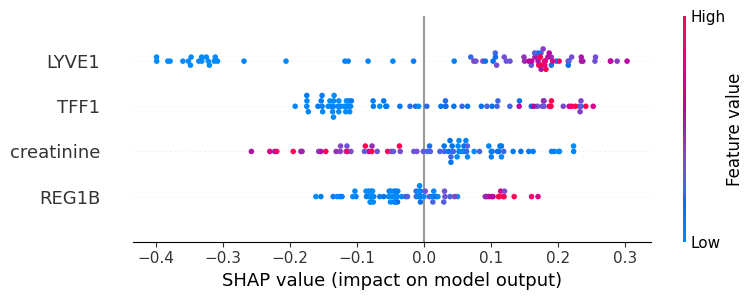

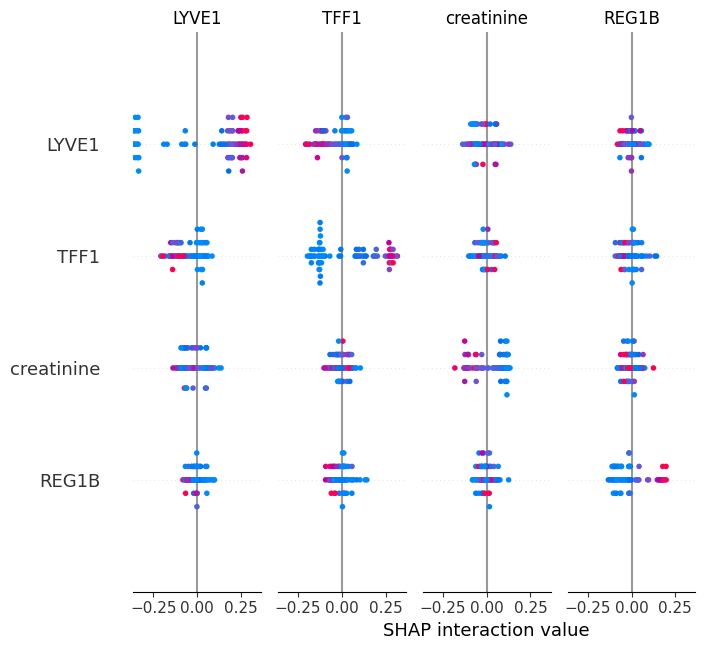

In [36]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load dataset
path = "../../Data/cancer/cancer.csv"
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis", "stage", 
         "benign_sample_diagnosis", "plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(path, names=names, skiprows=1)

# Drop unused columns
drop_cols = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "stage", 
             "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_cols)

# Drop rows with missing values
data = data.dropna()

# Encode diagnosis
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes
data = data[data['diagnosis'].isin([0, 2])]
data['diagnosis'] = data['diagnosis'].replace({2: 1})  # Healthy (0) vs. Cancer (1)

# Features & target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=20
)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled test set back to DataFrame for SHAP
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Train Random Forest
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train_scaled, y_train)

# SHAP Tree Explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_df)

# Use SHAP values for class 1 (Cancer)
shap_vals_class1 = shap_values[1]

# Plot SHAP summary (cancer class)
shap.summary_plot(shap_vals_class1[:, :X_test_df.shape[1]], X_test_df, show=False)
plt.tight_layout()
plt.show()

# Plot SHAP interaction values
shap_inter = explainer.shap_interaction_values(X_test_df)
shap.summary_plot(shap_inter[1], X_test_df, show=False)
plt.tight_layout()
plt.show()

In [37]:
# Convert the interpretability scores dictionary to a DataFrame and sort by sparsity
# Lower sparsity = simpler model explanations (fewer important features per prediction)
interpret_df = pd.DataFrame(interpret_scores).T.sort_values("sparsity")
interpret_df  # Display the table


,mean_shap_magnitude,sparsity
Logistic Regression,0.101896,3.610390
SVM,0.120118,3.766234
Random Forest,0.124883,3.857143
XGBoost,1.576175,3.974026


shap_values[0] shape: (77, 4)
X_test_df shape: (77, 4)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


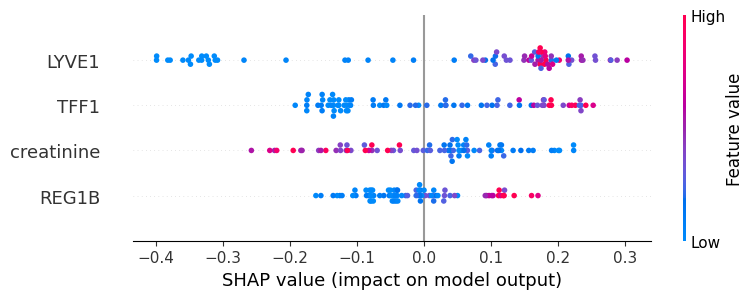

In [38]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load and clean data
path = "../../Data/cancer/cancer.csv"
names = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "diagnosis", "stage", 
         "benign_sample_diagnosis", "plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"]
data = pd.read_csv(path, names=names, skiprows=1)

drop_cols = ["sample_id", "patient_cohort", "sample_origin", "age", "sex", "stage", 
             "benign_sample_diagnosis", "plasma_CA19_9", "REG1A"]
data = data.drop(columns=drop_cols).dropna()
data['diagnosis'] = data['diagnosis'].astype('category').cat.codes
data = data[data['diagnosis'].isin([0, 2])]
data['diagnosis'] = data['diagnosis'].replace({2: 1})

# Train-test split
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=20)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Back to DataFrame
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Model
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train_scaled, y_train)

# SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_df)

# DEBUG shape mismatch
print("shap_values[0] shape:", shap_values[0].shape)
print("X_test_df shape:", X_test_df.shape)

# Plot - handle either binary class list or single array
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_test_df, feature_names=X.columns)
else:
    shap.summary_plot(shap_values, X_test_df, feature_names=X.columns)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


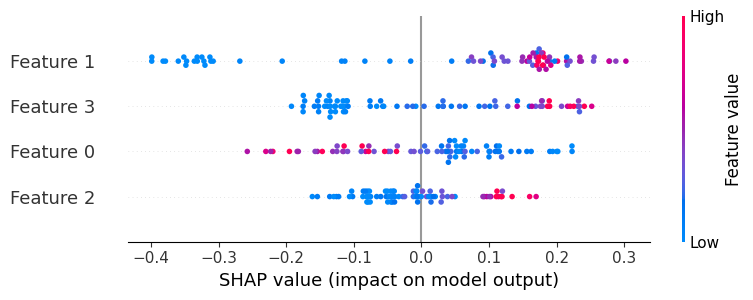

In [41]:
import matplotlib.pyplot as plt

# Set a larger figure size
plt.figure(figsize=(12, 8))  # You can adjust width/height as needed

# Show SHAP summary plot
shap.summary_plot(shap_values[1], X_test_scaled, show=False)

# Force layout and display
plt.tight_layout()
plt.show()


In [42]:
# Detailed SHAP Analysis - Random Forest 
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# SHAP Explainer (TreeExplainer is fast for tree models)
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values for test set
shap_values = explainer.shap_values(X_test_scaled)

# For binary classification: use class 1 SHAP values
rf_shap = shap_values[1]

In [45]:
print("SHAP shape:", rf_shap.shape)
print("X_test shape:", X_test_scaled.shape)

SHAP shape: (77, 4)
X_test shape: (77, 4)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


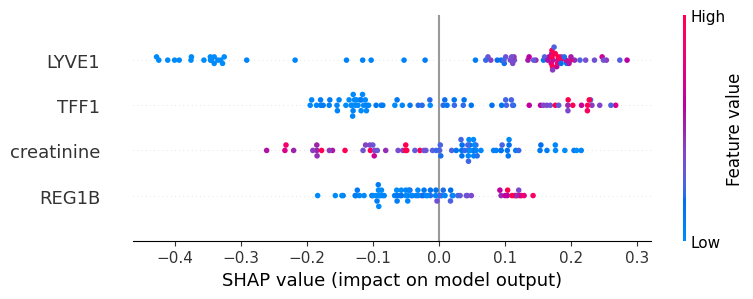

In [46]:
shap.summary_plot(rf_shap, X_test_scaled, feature_names=X.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


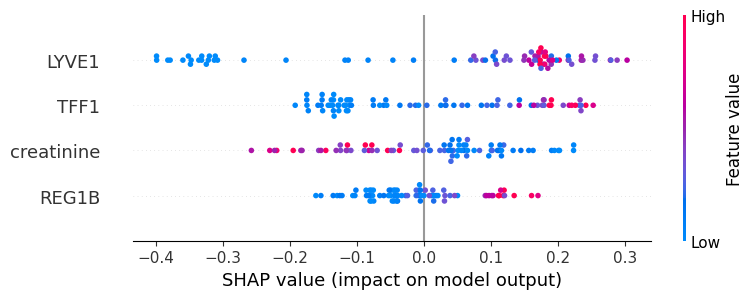

In [48]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Selected features for SHAP plot
selected_features = ["creatinine", "LYVE1", "REG1B", "TFF1"]

# Subset training and test data
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Scale selected features
scaler_sel = StandardScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_sel.transform(X_test_sel)

# Train Random Forest on selected features
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train_sel_scaled, y_train)

# SHAP explainer
explainer_rf = shap.TreeExplainer(rf_model)
shap_values = explainer_rf.shap_values(X_test_sel_scaled)

# Get SHAP values for class 1 (cancer)
shap_values_to_plot = shap_values[1] if isinstance(shap_values, list) else shap_values

# Convert test set to DataFrame for SHAP plotting
X_test_df = pd.DataFrame(X_test_sel_scaled, columns=selected_features)

# ✅ Now plot
plt.figure(figsize=(10, 5))  # or (12, 6)
shap.summary_plot(shap_values_to_plot, X_test_df)
